In [1]:
import numpy as np
import pandas as pd
import cv2

In [5]:
class_map = pd.read_csv('data/class_map.csv')
class_map.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [6]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [7]:
train_df[['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']] = train_df[['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']].astype('uint8') # to save memory

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200840 entries, 0 to 200839
Data columns (total 5 columns):
image_id               200840 non-null object
grapheme_root          200840 non-null uint8
vowel_diacritic        200840 non-null uint8
consonant_diacritic    200840 non-null uint8
grapheme               200840 non-null object
dtypes: object(2), uint8(3)
memory usage: 3.6+ MB


In [9]:
train_df.drop('grapheme', axis= 1, inplace= True)

In [10]:
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic
0,Train_0,15,9,5
1,Train_1,159,0,0
2,Train_2,22,3,5
3,Train_3,53,2,2
4,Train_4,71,9,5


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200840 entries, 0 to 200839
Data columns (total 4 columns):
image_id               200840 non-null object
grapheme_root          200840 non-null uint8
vowel_diacritic        200840 non-null uint8
consonant_diacritic    200840 non-null uint8
dtypes: object(1), uint8(3)
memory usage: 2.1+ MB


In [9]:
train_imgs0 = pd.read_parquet("data/train_image_data_0.parquet")
train_imgs0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50210 entries, 0 to 50209
Columns: 32333 entries, image_id to 32331
dtypes: object(1), uint8(32332)
memory usage: 1.5+ GB


In [10]:
train_imgs1 = pd.read_parquet("data/train_image_data_1.parquet")
train_imgs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50210 entries, 0 to 50209
Columns: 32333 entries, image_id to 32331
dtypes: object(1), uint8(32332)
memory usage: 1.5+ GB


In [11]:
train_imgs2 = pd.read_parquet("data/train_image_data_2.parquet")
train_imgs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50210 entries, 0 to 50209
Columns: 32333 entries, image_id to 32331
dtypes: object(1), uint8(32332)
memory usage: 1.5+ GB


In [12]:
train_imgs3 = pd.read_parquet("data/train_image_data_3.parquet")
train_imgs3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50210 entries, 0 to 50209
Columns: 32333 entries, image_id to 32331
dtypes: object(1), uint8(32332)
memory usage: 1.5+ GB


In [13]:
train_imgs = pd.concat(
                    [train_imgs0, train_imgs1, train_imgs2, train_imgs3],
                    ignore_index= True)
train_imgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200840 entries, 0 to 200839
Columns: 32333 entries, image_id to 32331
dtypes: object(1), uint8(32332)
memory usage: 6.0+ GB


In [14]:
del train_imgs0, train_imgs1, train_imgs2, train_imgs3

In [15]:
img_id = train_imgs['image_id']

In [16]:
train_imgs.drop('image_id', axis= 1, inplace= True)

In [17]:
def resize(df, size=64):
    resized = {}
    for i in range(df.shape[0]):
        image = cv2.resize(df.loc[df.index[i]].values.reshape(137,236),(size,size))
        resized[df.index[i]] = image.reshape(-1)
    resized = pd.DataFrame(resized).T
    return resized

In [18]:
train_imgs_resized = resize(train_imgs)

In [19]:
train_imgs_resized['image_id'] = img_id

In [20]:
train_df = train_df.merge(train_imgs_resized, on= 'image_id')
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,0,1,2,3,4,5,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Train_0,15,9,5,253,252,253,253,254,253,...,252,252,252,252,253,253,253,253,253,253
1,Train_1,159,0,0,247,248,251,247,249,252,...,255,255,255,255,255,255,255,255,255,255
2,Train_2,22,3,5,251,248,253,251,254,252,...,253,253,251,251,251,252,252,253,253,252
3,Train_3,53,2,2,248,251,250,250,250,246,...,253,252,252,254,254,251,252,254,254,251
4,Train_4,71,9,5,248,245,238,240,237,234,...,255,255,255,255,255,255,255,255,255,255


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200840 entries, 0 to 200839
Columns: 4100 entries, image_id to 4095
dtypes: object(1), uint8(4099)
memory usage: 788.2+ MB


In [13]:
import pickle

In [14]:
# pickle.dump(train_df, open('cleaned_training.p', 'wb'))

In [ ]:
train_df = pickle.load(open('cleaned_training.p', 'rb'))

In [17]:
X_train = train_df.drop(
                ['image_id', 'grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
                axis= 1)/255

In [18]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.992157,0.988235,0.992157,0.992157,0.996078,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.988235,0.988235,0.988235,0.988235,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157
1,0.968627,0.972549,0.984314,0.968627,0.976471,0.988235,0.988235,0.980392,0.984314,0.988235,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.984314,0.972549,0.992157,0.984314,0.996078,0.988235,0.992157,0.980392,0.988235,0.988235,...,0.992157,0.992157,0.984314,0.984314,0.984314,0.988235,0.988235,0.992157,0.992157,0.988235
3,0.972549,0.984314,0.980392,0.980392,0.980392,0.964706,0.984314,0.980392,0.980392,0.988235,...,0.992157,0.988235,0.988235,0.996078,0.996078,0.984314,0.988235,0.996078,0.996078,0.984314
4,0.972549,0.960784,0.933333,0.941176,0.929412,0.917647,0.925490,0.921569,0.941176,0.949020,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# CNN takes images in shape `(batch_size, h, w, channels)`, so reshape the images
X_train = X_train.values.reshape(-1, 64, 64, 1)

In [28]:
Y_train_root = pd.get_dummies(train_df['grapheme_root']).values

In [29]:
Y_train_vowel = pd.get_dummies(train_df['vowel_diacritic']).values

In [30]:
Y_train_consonant= pd.get_dummies(train_df['consonant_diacritic']).values

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split(X_train, Y_train_root, Y_train_vowel, Y_train_consonant, test_size=0.05, random_state=42)

In [1]:
from keras.models import Model, Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.3)(model)

# model = Flatten()(model)
dense = Dense(1024, activation = "relu")(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [12]:
for layer in model.layers:
    print(layer)

In [14]:
Dense(1024, activation= 'relu')

In [15]:
new_layer = Flatten()(model.layers[-5].output)
for i in [-4,-3]:
    new_layer = model.layers[i-1](model.layers[i].output)
root = Dense(168, activation = 'softmax')(new_layer)
vowel = Dense(11, activation = 'softmax')(new_layer)
consonant = Dense(7, activation = 'softmax')(new_layer)
model = Model(inputs=inputs, outputs=[root, vowel, consonant])

ValueError: Input 0 is incompatible with layer dense_1: expected axis -1 of input shape to have value 32 but got shape (None, 32, 32, 168)

In [11]:
new_layer

<tf.Tensor 'flatten_3/Reshape:0' shape=(None, None) dtype=float32>

In [10]:
model.layers

In [15]:
model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [3]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [35]:
model.compile(optimizer= 'adam',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

In [36]:
hist = model.fit(x_train, [y_train_root, y_train_vowel, y_train_consonant],
                epochs = 32,
                batch_size= 512,
                validation_split= 0.2)

Train on 152638 samples, validate on 38160 samples
Epoch 1/32
152638/152638 [==============================] - 93s 612us/step - loss: 7.3874 - dense_2_loss: 4.6657 - dense_3_loss: 1.5039 - dense_4_loss: 1.2128 - dense_2_accuracy: 0.0684 - dense_3_accuracy: 0.5720 - dense_4_accuracy: 0.6640 - val_loss: 5.6256 - val_dense_2_loss: 3.9731 - val_dense_3_loss: 0.9083 - val_dense_4_loss: 0.7436 - val_dense_2_accuracy: 0.1190 - val_dense_3_accuracy: 0.6771 - val_dense_4_accuracy: 0.7328
Epoch 2/32
152638/152638 [==============================] - 81s 529us/step - loss: 5.0553 - dense_2_loss: 3.5946 - dense_3_loss: 0.7671 - dense_4_loss: 0.6925 - dense_2_accuracy: 0.1753 - dense_3_accuracy: 0.7369 - dense_4_accuracy: 0.7548 - val_loss: 4.6965 - val_dense_2_loss: 3.3637 - val_dense_3_loss: 0.6991 - val_dense_4_loss: 0.6337 - val_dense_2_accuracy: 0.2163 - val_dense_3_accuracy: 0.7646 - val_dense_4_accuracy: 0.7738
Epoch 3/32
152638/152638 [==============================] - 81s 530us/step - loss: 

In [37]:
hist.history

{'dense_2_accuracy': [0.068370916,
  0.17529055,
  0.26917937,
  0.34896946,
  0.42058334,
  0.48254696,
  0.5373236,
  0.5876584,
  0.63400334,
  0.6729648,
  0.7106487,
  0.7414602,
  0.77549493,
  0.7976323,
  0.8195403,
  0.83889335,
  0.8534113,
  0.867058,
  0.8782544,
  0.88663375,
  0.89547163,
  0.9021803,
  0.90896106,
  0.9122761,
  0.9182248,
  0.92323667,
  0.9265976,
  0.9311836,
  0.93196976,
  0.93450516,
  0.93789226,
  0.9395039],
 'dense_2_loss': [4.665741,
  3.594601,
  3.0203805,
  2.5869288,
  2.2353287,
  1.9459743,
  1.6968771,
  1.4840583,
  1.2932985,
  1.1377455,
  0.99176645,
  0.8691948,
  0.75296324,
  0.6655557,
  0.587221,
  0.5223525,
  0.47439674,
  0.42744654,
  0.38705012,
  0.3585701,
  0.33430773,
  0.31379437,
  0.28890058,
  0.2762217,
  0.26135743,
  0.24427359,
  0.2350173,
  0.2211932,
  0.21521404,
  0.20648262,
  0.19750813,
  0.19442159],
 'dense_3_accuracy': [0.5719611,
  0.73690695,
  0.78678966,
  0.8192455,
  0.8403805,
  0.85971385,
  

In [38]:
model.save('model_1.h5')
print('Model saved to disk')

Model saved to disk


In [39]:
del model

In [40]:
from keras.models import load_model

In [41]:
model = load_model('model_1.h5')

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [43]:
pickle.dump(hist, open('model_1_history.p', 'wb'))

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
hist.history

{'dense_2_accuracy': [0.068370916,
  0.17529055,
  0.26917937,
  0.34896946,
  0.42058334,
  0.48254696,
  0.5373236,
  0.5876584,
  0.63400334,
  0.6729648,
  0.7106487,
  0.7414602,
  0.77549493,
  0.7976323,
  0.8195403,
  0.83889335,
  0.8534113,
  0.867058,
  0.8782544,
  0.88663375,
  0.89547163,
  0.9021803,
  0.90896106,
  0.9122761,
  0.9182248,
  0.92323667,
  0.9265976,
  0.9311836,
  0.93196976,
  0.93450516,
  0.93789226,
  0.9395039],
 'dense_2_loss': [4.665741,
  3.594601,
  3.0203805,
  2.5869288,
  2.2353287,
  1.9459743,
  1.6968771,
  1.4840583,
  1.2932985,
  1.1377455,
  0.99176645,
  0.8691948,
  0.75296324,
  0.6655557,
  0.587221,
  0.5223525,
  0.47439674,
  0.42744654,
  0.38705012,
  0.3585701,
  0.33430773,
  0.31379437,
  0.28890058,
  0.2762217,
  0.26135743,
  0.24427359,
  0.2350173,
  0.2211932,
  0.21521404,
  0.20648262,
  0.19750813,
  0.19442159],
 'dense_3_accuracy': [0.5719611,
  0.73690695,
  0.78678966,
  0.8192455,
  0.8403805,
  0.85971385,
  

In [74]:
def plot_loss(model, hist):
    epochs = len(hist.history['loss'])
    loss_names = []
    for name in model.output_names:
        loss_names.append(name + '_loss')
        loss_names.append('val_' +name + '_loss')
    plt.style.use('ggplot')
    plt.figure(figsize= (12,15))
    plt.plot(np.arange(0, epochs), hist.history['loss'], label='train_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[0]], label='train_root_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[2]], label='train_vowel_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[4]], label='train_consonant_loss')
    
    plt.plot(np.arange(0, epochs), hist.history['val_loss'], label='val_train_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[1]], label='val_train_root_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[3]], label='val_train_vowel_loss')
    plt.plot(np.arange(0, epochs), hist.history[loss_names[5]], label='val_train_consonant_loss')
    
    plt.title('Loss against number of epochs')
    plt.xlabel('Epoch #')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

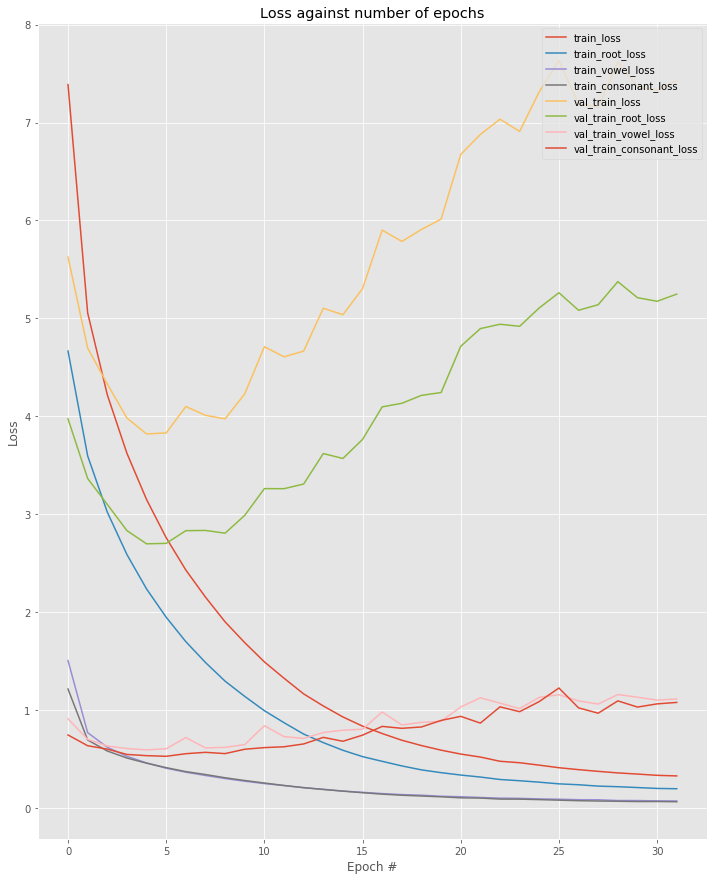

In [75]:
plot_loss(model, hist)

In [79]:
def plot_accuracy(model, hist):
    epochs = len(hist.history['loss'])
    acc_names = []
    for name in model.output_names:
        acc_names.append(name + '_accuracy')
        acc_names.append('val_' +name + '_accuracy')
    plt.style.use('ggplot')
    plt.figure(figsize= (12,15))
    plt.plot(np.arange(0, epochs), hist.history[acc_names[0]], label='train_root_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[2]], label='train_vowel_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[4]], label='train_consonant_accuracy')
    
    plt.plot(np.arange(0, epochs), hist.history[acc_names[1]], label='val_train_root_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[3]], label='val_train_vowel_accuracy')
    plt.plot(np.arange(0, epochs), hist.history[acc_names[5]], label='val_train_consonant_accuracy')
    
    plt.title('Accuracy against number of epochs')
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()

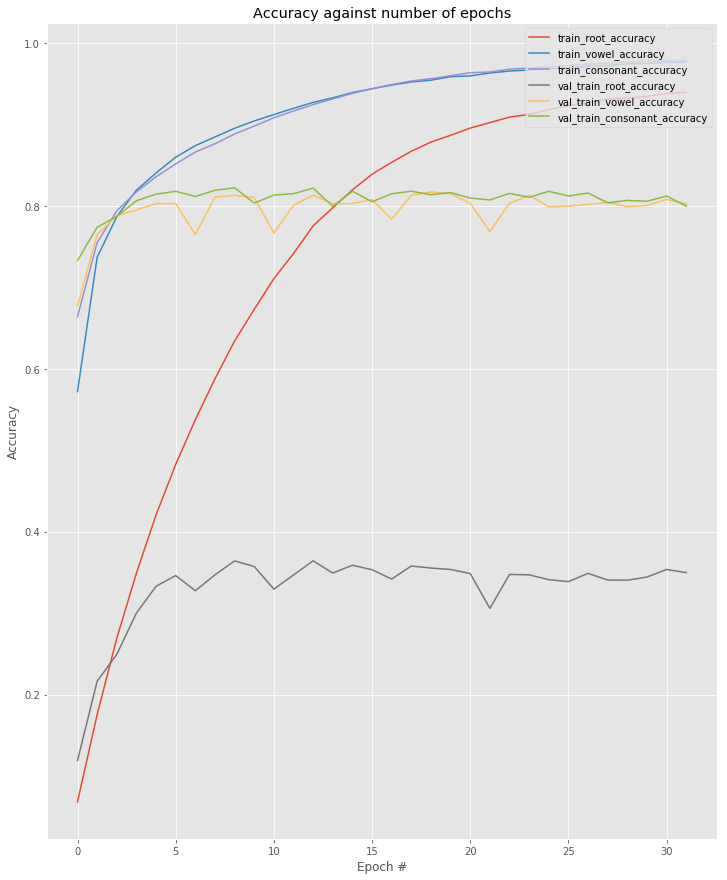

In [80]:
plot_accuracy(model, hist)